# Kelompok 9
Nama Anggota Kelompok:
1. Adjie Tresnohadi Dermawan
2. Baginda Habiburohman
3. Moses Johanes Febrian Manuputty

---

## 1. Perkenalan

### 1.1 Latar Belakang
Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan himpunan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.
Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, ketidakaktifan fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.
Orang dengan penyakit kardiovaskular atau yang berisiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.


## 1.2 Objective yang Ingin Dicapai
1. Mampu memahami konsep Classification dengan Ensemble Model
2. Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
3. Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

## 2. Import Pustaka yang dibutuhkan

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

## 3. Data Loading

## 3.1 Import Data

In [29]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
pd.set_option('display.max.columns', None)

In [30]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [31]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [32]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## 3.2 Cek Isi Data

In [33]:
df.shape

(299, 13)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [35]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 4. Data Cleaning

### 4.1 Mengubah isi data yang bernilai 1 dan 0

In [43]:
#Mengubah nilai 0 dan 1 menjadi no dan yes dan terkhusus value pada sex
#diubah menjadi female dan male

df.anaemia = df.anaemia.replace({0:'no', 1:'yes'})
df.diabetes = df.diabetes.replace({0:'no', 1:'yes'})
df.high_blood_pressure = df.high_blood_pressure.replace({0:'no', 1:'yes'})
df.sex = df.sex.replace({0:'female',1:'male'})
df.smoking = df.smoking.replace({0:'no', 1:'yes'})
df.DEATH_EVENT = df.DEATH_EVENT.replace({0:'no', 1:'yes'})
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,no,582,no,20,yes,265000.00,1.9,130,male,no,4,yes
1,55.0,no,7861,no,38,no,263358.03,1.1,136,male,no,6,yes
2,65.0,no,146,no,20,no,162000.00,1.3,129,male,yes,7,yes
3,50.0,yes,111,no,20,no,210000.00,1.9,137,male,no,7,yes
4,65.0,yes,160,yes,20,no,327000.00,2.7,116,female,no,8,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,no,61,yes,38,yes,155000.00,1.1,143,male,yes,270,no
295,55.0,no,1820,no,38,no,270000.00,1.2,139,female,no,271,no
296,45.0,no,2060,yes,60,no,742000.00,0.8,138,female,no,278,no
297,45.0,no,2413,no,38,no,140000.00,1.4,140,male,yes,280,no


### 4.2 Mengecek Missing Value pada Dataset

In [16]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [17]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

## 5. Data Exploration

### 5.1 Total Kematian berdasarkan Gender

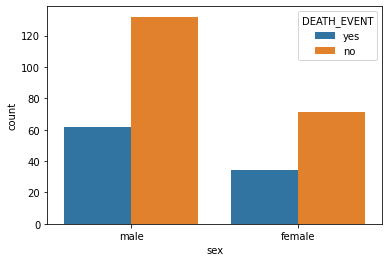

In [75]:
sns.countplot (x='sex', hue = 'DEATH_EVENT',data =df)
plt.show()

Dari hasil plotting diatas, disimpulkan bahwa laki-laki memiliki rentan meninggal dunia yang lebih tinggi dibandingkan dengan perempuan

### 5.2 Pecandu Rokok berdasarkan Jenis Kelamin

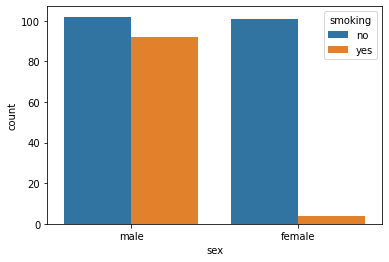

In [76]:
sns.countplot (x='sex', hue = 'smoking',data =df)
plt.show()

Dari hasil plotting diatas, dapat disimpulkan bahwa laki-laki lebih banyak mengonsumsi rokok daripada perempuan

### 5.3 Penderita Diabetes berdasarkan Jenis Kelamin

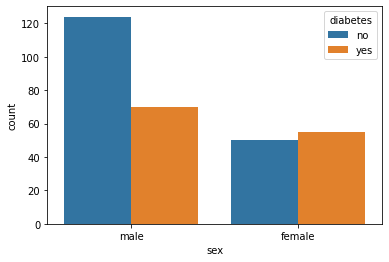

In [77]:
sns.countplot (x='sex', hue = 'diabetes',data =df)
plt.show()

Dari hasil plotting diatas, disimpulkan untuk laki-laki paling banyak tidak menderita diabetes. Sedangkan perempuan dari total data yang dikumpulkan lebih banyak yang menderita diabetes

### 5.4 Pengaruh Diabetes terhadap Pasien yang Meninggal

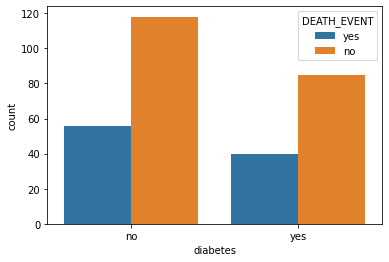

In [87]:
sns.countplot (x='diabetes', hue = 'DEATH_EVENT',data =df)
plt.show()

Dari hasil plotting diatas, disimpulkan untuk penderita diabetes memiliki pengaruh yang berbeda tipis terhadap pasien yang meninggal dibandingkan dengan yang tidak menderita diabetes

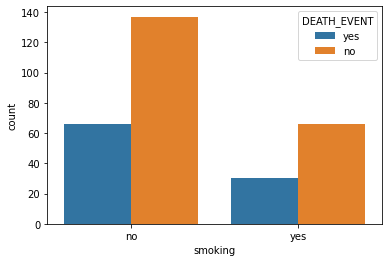

In [88]:
sns.countplot (x='smoking', hue = 'DEATH_EVENT',data =df)
plt.show()

Dari hasil plotting diatas, disimpulkan untuk pasien perokok juga memiliki rentan untuk meninggal dunia dibanding yang tidak perokok

## 6. Data Preprocessing

### 6.1 Mengubah Isi data pada beberapa kolom

In [109]:
le = LabelEncoder()
df.anaemia = le.fit_transform(df.anaemia)
df.diabetes = le.fit_transform(df.diabetes)
df.sex = le.fit_transform(df.sex)
df.high_blood_pressure = le.fit_transform(df.high_blood_pressure)
df.smoking = le.fit_transform(df.smoking)
df.DEATH_EVENT = le.fit_transform(df.DEATH_EVENT)

In [110]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Text(0.5, 1.0, 'Correlation Matrix')

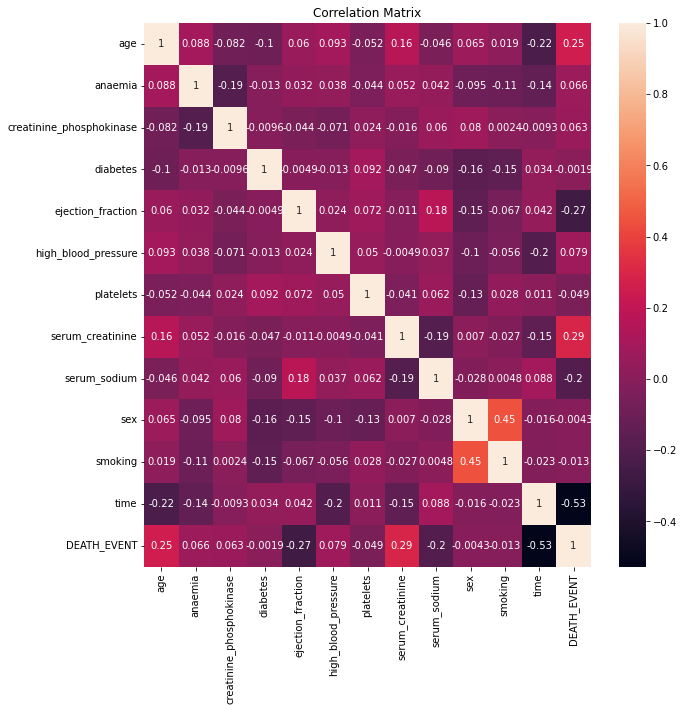

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')

In [112]:
x = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']
print(x)
print(y)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

### 6.2 Membagi dataset untuk data train dan data test

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 15)

## 7. Pendefinisian Model

### 7.1 Random Forest Classifier

In [114]:
rfc_model = RandomForestClassifier(n_estimators=50, random_state=46)

### 7.2 XGBoost

In [115]:
XGB_model = XGBClassifier(n_estimators=50, random_state=46)

### 7.3 Random Forest Regresor

In [116]:
rfg_model = RandomForestRegressor(n_estimators=50, random_state=46)

## 8. Pelatihan Model

### 8.1 Random Forest Classifier

In [117]:
model_1 = rfc_model.fit(x_train, y_train)

### 8.2 XGBoost

In [118]:
model_2 = XGB_model.fit(x_train, y_train)

### 8.3 Random Forest Regressor

In [119]:
model_3 = rfg_model.fit(x_train, y_train)

## 9. Model Evaluation

### 9.1 Random Forest Classifier

In [120]:
rfc_pred = rfc_model.predict(x_test)
print("Test Score:", rfc_model.score(x_test, y_test))
print("Train Score:", rfc_model.score(x_train, y_train))

Test Score: 0.8166666666666667
Train Score: 1.0


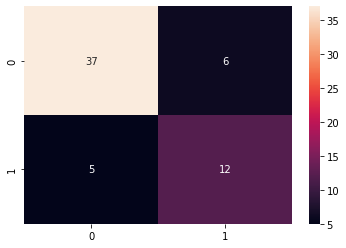

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.67      0.71      0.69        17

    accuracy                           0.82        60
   macro avg       0.77      0.78      0.78        60
weighted avg       0.82      0.82      0.82        60



In [121]:
pred1 = confusion_matrix(y_test, rfc_pred)
sns.heatmap(pred1, annot=True)
plt.show()
print(classification_report(y_test, rfc_pred))

### 9.2 XGBoost

In [122]:
XGB_pred = XGB_model.predict(x_test)
print("Test Score:", XGB_model.score(x_test, y_test))
print("Train Score:", XGB_model.score(x_train, y_train))

Test Score: 0.7666666666666667
Train Score: 1.0


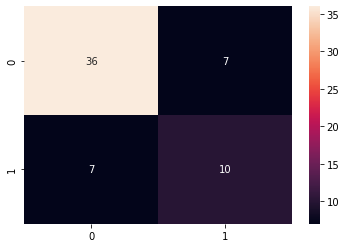

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.59      0.59      0.59        17

    accuracy                           0.77        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.77      0.77      0.77        60



In [123]:
pred2 = confusion_matrix(y_test, XGB_pred)
sns.heatmap(pred2, annot=True)
plt.show()
print(classification_report(y_test, XGB_pred))

### 9.3 Random Forest Regressor

In [128]:
rfg_pred = rfg_model.predict(x_test)
print("Test Score:", rfg_model.score(x_test, y_test))
print("Train Score:", rfg_model.score(x_train, y_train))

Test Score: 0.41933789329685345
Train Score: 0.917824841772152


## 10. Model Inference

In [133]:
print('Input Nilai untuk Prediksi Penderita Penyakit Jantung')
age = float(input("Usia: "))
anaemia = float(input("Apakah menderita anemia (1=iya, 0=tidak): "))
creatinine_phosphokinase = float(input("Kadar CPK: "))
diabetes = float(input("Apakah menderita diabetes (1=iya, 0=tidak): "))
ejection_fraction = float(input("Fraksi Ejeksi: "))
high_blood_pressure = float(input('Apakah menderita tekanan darh tinggi (1=iya, 0=tidak): '))
platelets = float(input('Jumlah platelets: '))
serum_creatinine = float(input('Kadar serum kreatinin: '))
serum_sodium = float(input('Kadar serum sodium: '))
sex = float(input('Jenis Kelamin (1=Laki-laki, 0=Perempuan):'))
smoking = float(input('Apakah perokok (1=iya, 0=tidak): '))
time = float(input('Lama tindak lanjut: '))

val = [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time]

val_predict = rfc_model.predict([val])
if val_predict == 1:
    print('Prediksi bernilai 1, maka diprediksi pasien tidak selamat')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka diprediksi pasien selamat')
else:
    print("tidak valid")


Input Nilai untuk Prediksi Penderita Penyakit Jantung
Usia: 29
Apakah menderita anemia (1=iya, 0=tidak): 1
Kadar CPK: 4432
Apakah menderita diabetes (1=iya, 0=tidak): 1
Fraksi Ejeksi: 532
Apakah menderita tekanan darh tinggi (1=iya, 0=tidak): 1
Jumlah platelets: 5323
Kadar serum kreatinin: 244
Kadar serum sodium: 245
Jenis Kelamin (1=Laki-laki, 0=Perempuan):1
Apakah perokok (1=iya, 0=tidak): 1
Lama tindak lanjut: 4
Prediksi bernilai 1, maka diprediksi pasien tidak selamat
